In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import cluster
import math

import scipy
import pylab
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform

import seaborn as sns

In [2]:
phos = pd.read_csv("phosData_inputTop_cooc.csv")

In [4]:
#### Pre-process for Perseus ####

phos = pd.read_csv("mcp.M117.068189-6.csv")
phos.head()


,Protein Accession,Gene_symbol,Site Position,Type,Motif,Ascore,Sequence,Quantified peptides,DMSO-1,DMSO-2,...,ST-3,(TNFα/DMSO),Log2(TNFα/DMSO),p_value(TNFα:DMSO),(SM+TNFα/DMSO),Log2(SM+TNFα/DMSO),p_value(SM+TNFα:DMSO),TNFα/(SM+TNFα),Log1.5[TNFα/(SM+TNFα)],p_value(TNFα:(SM+TNFα))
0,Q09666,AHNAK,5261,Single,VHAQLPSLEGDLR,1000,K.MEGGGAEVHAQLPS#LEGDLR.G,1.0,0.015987,0.018344,...,0.193506,9.805130,3.293537,0.000905,9.397577753,3.232288947,0.000534902,1.043368,0.104704,0.845998
1,O14920,IKBKB,695,Single,SQPSTASNSLPEP,20.16692118,R.LSQPGQLMSQPSTAS#NSLPEPAK.K,1.0,0.013742,0.017778,...,0.246912,8.642105,3.111383,0.000834,11.3296844,3.502035769,0.002995347,0.762784,-0.667826,0.363535
2,Q15390,MTFR1,132,Single,EEPQLKTPALANE,1000,K.T#PALANEEALQK.I,2.0,0.029520,0.032540,...,0.034228,7.260275,2.860024,0.015611,4.295167575,2.102714419,0.048304101,1.690336,1.294630,0.311308
3,P17812,CTPS1,587,Single,TELKFPSINHDxx,1000,K.FPS#INHD.-,1.0,0.019609,0.024932,...,0.091963,6.830116,2.771910,0.000001,5.49588387,2.45835152,0.00165617,1.242769,0.536032,0.211434
4,Q6PJW8,CNST,436,Single,KTEPLISPGCDRI,38.18877921,K.TEPLIS#PGCDR.I,1.0,0.023454,0.037395,...,0.035371,6.011420,2.587706,0.017706,4.12694601,2.045074565,0.052573715,1.456627,0.927634,0.450825


In [5]:
# Mark the ones significant and at log(ratio) > 1 or < -1

phos["sig_ratLogPos"] = ""
phos["sig_ratLogNeg"] = ""


countPvalue = 0
countPvaluePos = 0

for index, row in phos.iterrows():
    if row["p_value(TNFα:DMSO)"] < 0.05:
        countPvalue += 1
        if row["Log2(TNFα/DMSO)"] < -1:
            phos["sig_ratLogNeg"][index] = "sig_ratLogNeg"
        if row["Log2(TNFα/DMSO)"] > 1:
            phos["sig_ratLogPos"][index] = "sig_ratLogPos"
            countPvaluePos += 1
# print(countPvaluePos)
phos.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,Protein Accession,Gene_symbol,Site Position,Type,Motif,Ascore,Sequence,Quantified peptides,DMSO-1,DMSO-2,...,Log2(TNFα/DMSO),p_value(TNFα:DMSO),(SM+TNFα/DMSO),Log2(SM+TNFα/DMSO),p_value(SM+TNFα:DMSO),TNFα/(SM+TNFα),Log1.5[TNFα/(SM+TNFα)],p_value(TNFα:(SM+TNFα)),sig_ratLogPos,sig_ratLogNeg
0,Q09666,AHNAK,5261,Single,VHAQLPSLEGDLR,1000,K.MEGGGAEVHAQLPS#LEGDLR.G,1.0,0.015987,0.018344,...,3.293537,0.000905,9.397577753,3.232288947,0.000534902,1.043368,0.104704,0.845998,sig_ratLogPos,
1,O14920,IKBKB,695,Single,SQPSTASNSLPEP,20.16692118,R.LSQPGQLMSQPSTAS#NSLPEPAK.K,1.0,0.013742,0.017778,...,3.111383,0.000834,11.3296844,3.502035769,0.002995347,0.762784,-0.667826,0.363535,sig_ratLogPos,
2,Q15390,MTFR1,132,Single,EEPQLKTPALANE,1000,K.T#PALANEEALQK.I,2.0,0.029520,0.032540,...,2.860024,0.015611,4.295167575,2.102714419,0.048304101,1.690336,1.294630,0.311308,sig_ratLogPos,
3,P17812,CTPS1,587,Single,TELKFPSINHDxx,1000,K.FPS#INHD.-,1.0,0.019609,0.024932,...,2.771910,0.000001,5.49588387,2.45835152,0.00165617,1.242769,0.536032,0.211434,sig_ratLogPos,
4,Q6PJW8,CNST,436,Single,KTEPLISPGCDRI,38.18877921,K.TEPLIS#PGCDR.I,1.0,0.023454,0.037395,...,2.587706,0.017706,4.12694601,2.045074565,0.052573715,1.456627,0.927634,0.450825,sig_ratLogPos,


In [6]:
phos.to_csv("mcp.M117.068189-4_categ.csv")

In [24]:
#### Pre-process for clusterring ####

## take only the significant (p>0.05) with high fold-change
phos = pd.read_csv("mcp.M117.068189-6.csv")

# Compute averages of experiments
phos["DMSO_average"] = phos.loc[: , "DMSO-1":"DMSO-4"].mean(axis=1)
phos["TNF_average"] = phos.loc[: , "TNF-1":"TNF-3"].mean(axis=1)

# phosTop = phos[(phos["p_value(TNFα:DMSO)"] < 0.05) & ((phos["Log2(TNFα/DMSO)"] < -1) | (phos["Log2(TNFα/DMSO)"] > 1))]
phosTop = phos[(phos["p_value(TNFα:DMSO)"] < 0.05) & (phos["Log2(TNFα/DMSO)"] > 1.5)]
phosTop = phos[(phos["p_value(TNFα:DMSO)"] < 0.05) & (phos["Log2(TNFα/DMSO)"] > 1.5)]

print(len(phosTop))
phosTop.head()

56


,Protein Accession,Gene_symbol,Site Position,Type,Motif,Ascore,Sequence,Quantified peptides,DMSO-1,DMSO-2,...,Log2(TNFα/DMSO),p_value(TNFα:DMSO),(SM+TNFα/DMSO),Log2(SM+TNFα/DMSO),p_value(SM+TNFα:DMSO),TNFα/(SM+TNFα),Log1.5[TNFα/(SM+TNFα)],p_value(TNFα:(SM+TNFα)),DMSO_average,TNF_average
0,Q09666,AHNAK,5261,Single,VHAQLPSLEGDLR,1000,K.MEGGGAEVHAQLPS#LEGDLR.G,1.0,0.015987,0.018344,...,3.293537,0.000905,9.397577753,3.232288947,0.000534902,1.043368,0.104704,0.845998,0.016232,0.159153
1,O14920,IKBKB,695,Single,SQPSTASNSLPEP,20.16692118,R.LSQPGQLMSQPSTAS#NSLPEPAK.K,1.0,0.013742,0.017778,...,3.111383,0.000834,11.3296844,3.502035769,0.002995347,0.762784,-0.667826,0.363535,0.015646,0.135212
2,Q15390,MTFR1,132,Single,EEPQLKTPALANE,1000,K.T#PALANEEALQK.I,2.0,0.029520,0.032540,...,2.860024,0.015611,4.295167575,2.102714419,0.048304101,1.690336,1.294630,0.311308,0.025862,0.187767
3,P17812,CTPS1,587,Single,TELKFPSINHDxx,1000,K.FPS#INHD.-,1.0,0.019609,0.024932,...,2.771910,0.000001,5.49588387,2.45835152,0.00165617,1.242769,0.536032,0.211434,0.024403,0.166678
4,Q6PJW8,CNST,436,Single,KTEPLISPGCDRI,38.18877921,K.TEPLIS#PGCDR.I,1.0,0.023454,0.037395,...,2.587706,0.017706,4.12694601,2.045074565,0.052573715,1.456627,0.927634,0.450825,0.029057,0.174674


In [8]:
## Try with https://stackoverflow.com/questions/2982929/plotting-results-of-hierarchical-clustering-ontop-of-a-matrix-of-data-in-python

# Generate a distance matrix.
phosTopN = len(phosTop)
x = phosTop["Log2(TNFα/DMSO)"].as_matrix()
D = scipy.zeros([phosTopN,phosTopN])
for i in range(phosTopN):
    for j in range(phosTopN):
        D[i,j] = abs(x[i] - x[j])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


/anaconda3/lib/python3.6/site-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


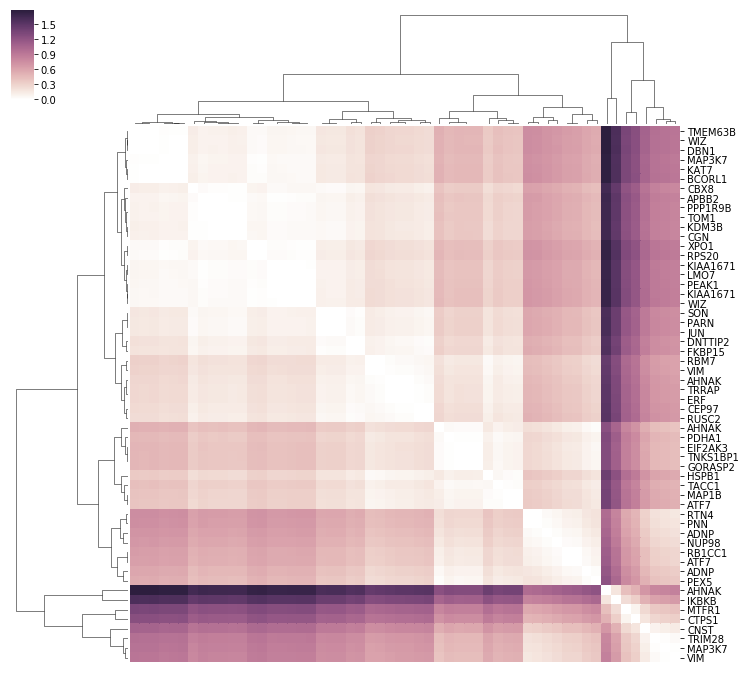

In [11]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns_plot = sns.clustermap(D, cmap=cmap, xticklabels=False, yticklabels=phosTop.Gene_symbol, figsize=(12,12))
sns_plot.savefig("DistCluster.png")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


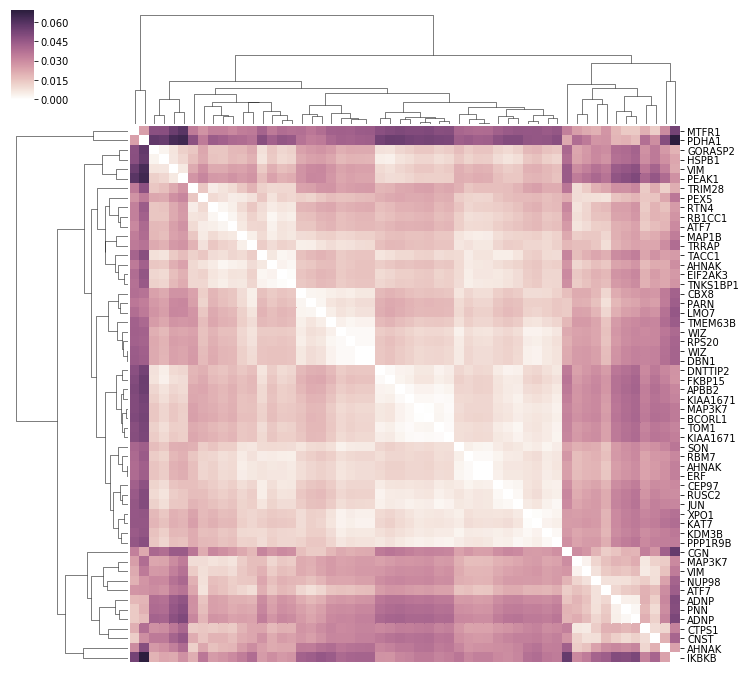

In [43]:
# Generate a 2D distance matrix.
phosTopN = len(phosTop)
x = phosTop["DMSO_average"].as_matrix()
y = phosTop["TNF_average"].as_matrix()
D = scipy.zeros([phosTopN,phosTopN])
for i in range(phosTopN):
    for j in range(phosTopN):
        D[i,j] = math.hypot(x[j] - x[i], y[j] - y[i])

cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns_plot = sns.clustermap(D, cmap=cmap, xticklabels=False, yticklabels=phosTop.Gene_symbol, figsize=(12,12))
sns_plot.savefig("DistCluster-2D.png")

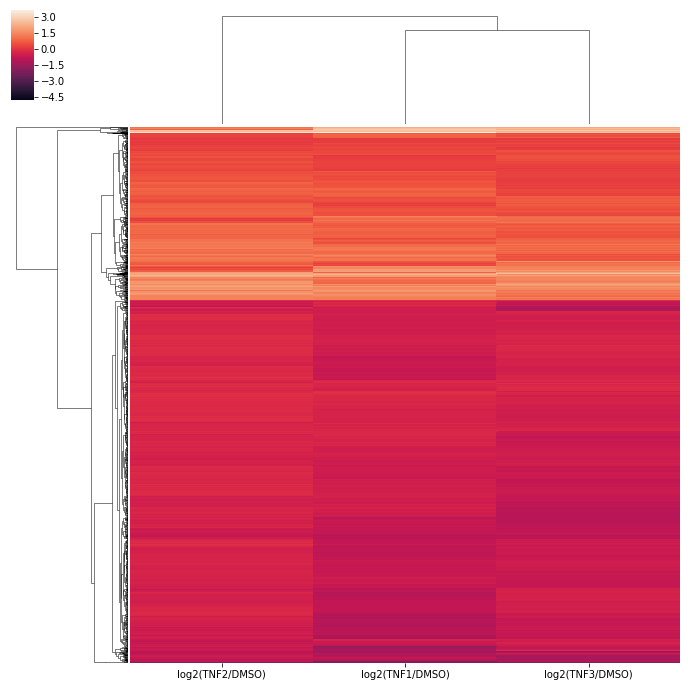

In [44]:
phos["log2(TNF1/DMSO)"] = np.log2(phos["TNF-1"] / phos["DMSO_average"])
phos["log2(TNF2/DMSO)"] = np.log2(phos["TNF-2"] / phos["DMSO_average"])
phos["log2(TNF3/DMSO)"] = np.log2(phos["TNF-3"] / phos["DMSO_average"])
phos.head()

phos = phos[(phos["p_value(TNFα:DMSO)"] < 0.05)]

cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns_plot = sns.clustermap(phos.loc[:, ["log2(TNF1/DMSO)", "log2(TNF2/DMSO)", "log2(TNF3/DMSO)"]], xticklabels=["log2(TNF1/DMSO)", "log2(TNF2/DMSO)", "log2(TNF3/DMSO)"], yticklabels=False, figsize=(12,12))
sns_plot.savefig("PCA-validation.png")